# TP 10 Regression quantile

In [83]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import cvxpy as cp

import os
import os.path

DATAFILE = "TP_10_RegressionQuantile-data.npz"


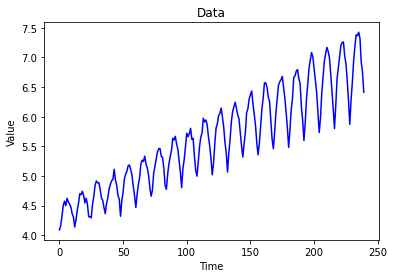

In [110]:
data = np.load(DATAFILE)

T=data['T']
Y=data['Y']

# affichage
plt.figure()
plt.title('Data')
plt.plot(T,Y,'b-')
plt.xlabel('Time')
plt.ylabel('Value')
plt.savefig('data.svg')

## Regression linéraire

1. Écrire une fonction qui calcule la regression linéaire sur les données à l'aide de `cvxpy` avec comme objectif l'erreur quadratique entre la droite et les données
2. Afficher la regression linéaire obtenue et son erreur
3. Écrire une fonction qui calcule la regression linéaire par l'intermédiaire d'une variable ressort.
4. Afficher la regression linéaire obtenue et la variable ressort


In [85]:
import numpy as np
import cvxpy as cp

def linReg1(x,y):
    
    n=y.size
    p=2
    
    # Données de la regression
    X=np.zeros((n,p))
    Y=np.zeros((n,1))
    X[:,0]=x
    X[:,1]=np.ones((n,))
    Y[:,0]=y
    
    # Variables
    alpha = cp.Variable((p,1))
    
    # Constitution du problème
    objective = cp.Minimize(cp.sum(cp.square(X@alpha-Y)))
    prob = cp.Problem(objective)
    
    # Résolution
    prob.solve()
    alphares=np.array(alpha.value)
    
    return alphares

In [86]:
alphares = linReg1(T,Y)
print(alphares)

[[0.0109808 ]
 [4.31899075]]


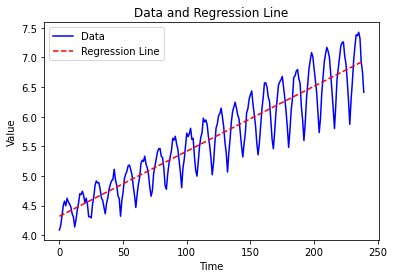

In [87]:
alphares = linReg1(T, Y)

# Plot
plt.figure()
plt.title('Data and Regression Line')
plt.plot(T, Y, 'b-', label='Data')
plt.plot(T, alphares[0] * T + alphares[1], 'r--', label='Regression Line')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.savefig('data_and_regression_line.svg')
plt.show()

## Ligne de crête

1. Écrire une fonction qui calcule la droite la plus proche des données tout en restant au dessus (ligne de crête)
2. Afficher la droite obtenue et la variable ressort

In [88]:
def linReg2(x,y):
    
    n=y.size
    p=2
    
    # Données de la regression
    X=np.zeros((n,p))
    Y=np.zeros((n,1))
    
    X[:,0]=x
    X[:,1]=np.ones((n,))
    Y[:,0]=y
    
    alpha = cp.Variable((p,1))
    slack = cp.Variable((n,1))
    
    # Constitution du problème
    objective = cp.Minimize(cp.sum(cp.square(slack)))
    
    constraints = [
        
    X@alpha - Y - slack == 0,
        
    #X@alpha-Y>0 si X@alpha (droite) > Y (observation)
    # donc -slack<=0 donc slack >=0
        
    slack>=0 ]
    
    prob = cp.Problem(objective, constraints)
    
    # Résolution
    prob.solve()
    
    alphares=np.array(alpha.value)
    slackres=np.array(slack.value)
    
    return alphares, slackres

In [89]:
alphares, slackres = linReg2(T,Y)
print(alphares)
##print(slackres)

[[0.01271783]
 [4.56502986]]


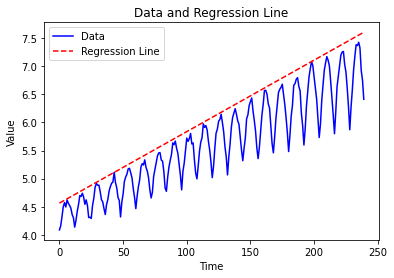

In [90]:
# Plot
plt.figure()
plt.title('Data and Regression Line')
plt.plot(T, Y, 'b-', label='Data')
plt.plot(T, alphares[0] * T + alphares[1], 'r--', label='Regression Line')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.savefig('data_and_regression_line.svg')
plt.show()

## Ligne de base

1. Écrire une fonction qui calcule la droite la plus proche des données tout en restant en dessous (ligne de base)
2. Afficher la droite obtenue et la variable ressort
3. Modifier la fonction pour que la contrainte sur la vraible ressort soit de la forme `ressort>0` sans negation dans la contrainte
4. Afficher la droite obtenue et la variable ressort

In [91]:
def linReg3(x,y):
    
    n=y.size
    p=2
    
    # Données de la regression
    X=np.zeros((n,p))
    Y=np.zeros((n,1))
    
    X[:,0]=x
    X[:,1]=np.ones((n,))
    Y[:,0]=y
    
    alpha = cp.Variable((p,1))
    slack = cp.Variable((n,1))
    
    # Constitution du problème
    objective = cp.Minimize(cp.sum(cp.square(slack)))
    
    constraints = [
        X@alpha-Y-slack==0,
        
        #X@alpha-Y<0 si Y (observation ) > X@alpha (droite)
        # donc -slack>=0
        
        -slack>=0]
    
    prob = cp.Problem(objective, constraints)
    
    # Résolution
    prob.solve()
    
    alphares=np.array(alpha.value)
    slackres=np.array(slack.value)
    
    return alphares, slackres

In [92]:
alphares, slackres = linReg3(T,Y)
print(alphares)
##print(slackres)

[[0.00861572]
 [3.90575043]]


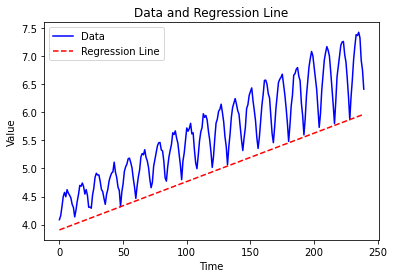

In [93]:
# Plot
plt.figure()
plt.title('Data and Regression Line')
plt.plot(T, Y, 'b-', label='Data')
plt.plot(T, alphares[0] * T + alphares[1], 'r--', label='Regression Line')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.savefig('data_and_regression_line.svg')
plt.show()

## Ligne médiane
En combinant la ligne de crête et la dernière version de la ligne de base
1. Écrire une fonction qui calcule la droite médiane. Veillez à retourner séparement les ressorts - et les ressorts +
2. Afficher la droite obtenue et les deux variables ressorts

In [94]:
def linReg4(x,y):
    
    n=y.size
    p=2
    
    # Données de la regression
    X=np.zeros((n,p))
    Y=np.zeros((n,1))
    
    X[:,0]=x
    X[:,1]=np.ones((n,))
    Y[:,0]=y
    
    alpha = cp.Variable((p,1))
    slackm = cp.Variable((n,1))
    slackp = cp.Variable((n,1))
    
    # Constitution du problème
    objective = cp.Minimize(cp.sum(cp.square(slackm+slackp)))
    
    constraints = [
        
    X@alpha-Y+slackm-slackp==0,
        
    slackp>=0,
        
    slackm>=0]
    
    prob = cp.Problem(objective, constraints)
    
    # Résolution
    prob.solve()
    
    alphares=np.array(alpha.value)
    slackm=np.array(slackm.value)
    slackp=np.array(slackp.value)
    
    return alphares, slackm, slackp

In [95]:
alphares, slackm, slackp = linReg4(T,Y)
print(alphares)
##print(slackm, slackp)

[[0.0109808 ]
 [4.31899075]]


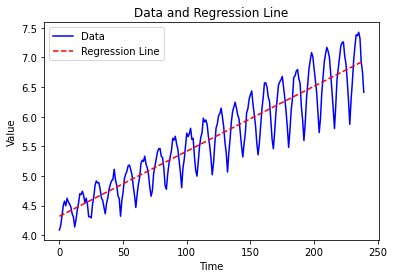

In [96]:
# Plot
plt.figure()
plt.title('Data and Regression Line')
plt.plot(T, Y, 'b-', label='Data')
plt.plot(T, alphares[0] * T + alphares[1], 'r--', label='Regression Line')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.savefig('data_and_regression_line.svg')
plt.show()

## Ligne quantile
En combinant la ligne de crête et la dernière version de la ligne de base avec une pondération `tau`
1. Écrire une fonction qui calcule la droite quantile. Veillez à retourner séparement les ressorts - et les ressorts +.
2. Afficher la droite obtenue pour `tau=0.3` et les deux variables ressorts
3. Afficher la droite obtenue pour divers `tau` compris entre 0 et 1. 
4. Normaliser avec la droite obtenue pour `tau=0.1` et la droite obtenue pour `tau=0.9` puis afficher les données normalisées.

In [97]:
def linReg5(x,y,tau):
    
    n=y.size
    p=2
    
    # Données de la regression
    X=np.zeros((n,p))
    Y=np.zeros((n,1))
    
    X[:,0]=x
    X[:,1]=np.ones((n,))
    Y[:,0]=y
    
    alpha = cp.Variable((p,1))
    slackm = cp.Variable((n,1))
    slackp = cp.Variable((n,1))
    
    # Constitution du problème
    objective = cp.Minimize(cp.sum(cp.square(tau*slackm+(1-tau)*slackp)))
    
    constraints = [
    X@alpha-Y+slackm-slackp==0,
        
    slackp>=0,
        
    slackm>=0]
    
    prob = cp.Problem(objective, constraints)
    
    # Résolution
    prob.solve()
    
    alphares=np.array(alpha.value)
    slackm=np.array(slackm.value)
    slackp=np.array(slackp.value)
    
    return alphares, slackm, slackp

In [98]:
alphares, slackm, slackp = linReg5(T,Y,0.2)
print(alphares)

[[0.00946692]
 [4.13711683]]


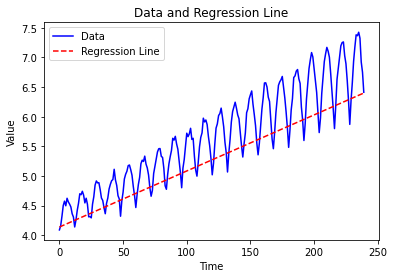

In [99]:
# Plot
plt.figure()
plt.title('Data and Regression Line')
plt.plot(T, Y, 'b-', label='Data')
plt.plot(T, alphares[0] * T + alphares[1], 'r--', label='Regression Line')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.savefig('data_and_regression_line.svg')
plt.show()

In [114]:
base_line, slackm, slackp = linReg5(T,Y,0.1)
Sky_line, slackm, slackp = linReg5(T,Y,0.9)


## Normalized_data = (Data - base_line) / (Sky_line - base_line) 
N = (T - base_line) / (Sky_line - base_line)

In [ ]:
# Obtain lines for tau=0.1 and tau=0.9
alpha_res_tau_01, slackm_tau_01, slackp_tau_01 = linReg5(x, y, 0.1)
alpha_res_tau_09, slackm_tau_09, slackp_tau_09 = linReg5(x, y, 0.9)

#formule prof
# Normalize data with the lines
y_normalized_tau_01 = (Y - (X * alpha_res_tau_01[0])) / alpha_res_tau_01[1]
y_normalized_tau_09 = (Y - (X * alpha_res_tau_09[0])) / alpha_res_tau_09[1]

In [116]:
alpha_res1, _, _ = linReg5(T,Y,0.1)
alpha_res9, _, _ = linReg5(T,Y,0.9)

a1 = alpha_res1[0, 0]
b1 = alpha_res1[1, 0]
a9 = alpha_res9[0, 0]
b9 = alpha_res9[1, 0]

# Normalisation des données en utilisant les droites de quantile
y_norm = (Y - (a1 * T + b1)) / (a9 * T + b9 - (a1 * T + b1))

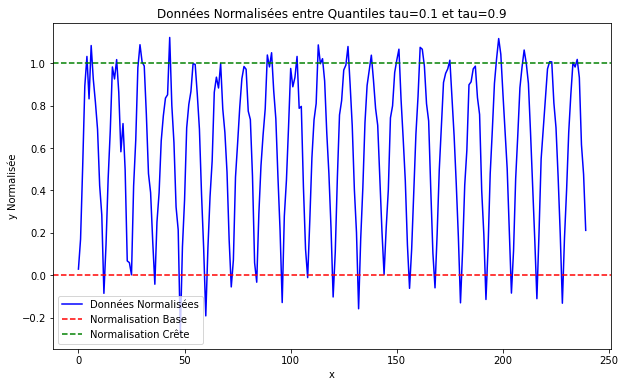

In [117]:
plt.figure(figsize=(10, 6))
plt.plot(T, y_norm, color='blue', label='Données Normalisées')
plt.axhline(0, color='red', linestyle='--', label='Normalisation Base')
plt.axhline(1, color='green', linestyle='--', label='Normalisation Crête')
plt.title('Données Normalisées entre Quantiles tau=0.1 et tau=0.9')
plt.xlabel('x')
plt.ylabel('y Normalisée')
plt.legend()
plt.show()